## Data Preprocessing
Data preparation involves data visualization, data cleaning and data exploration. Data cleaning involves the following;
- Handling Data imbalance
- Feature selection
- Feature scaling
- Handling categorical variables
- Handling missing data

For the selection of the ML algorithm to use, data visualization and data correlation are heavily used to decide this choice. When a two features are strongly correlated, only one should be used else it will act as noise in the system and increase model complexity thereby leading to overfitting. Removing these features is also necessary due to speed because having unneccesary information adds more calculation and parameters to the model.

When a feature is weakly correlated to the outcome, it can be removed from the feature set.Data visualization helps find how many of the individual features correlate with the output.

Random forests/decision trees can be used to find data correlation. One popular rank correlation method in ML is the Principal Component Analysis. It’s a technique to find patterns in high dimensional data. Basically, it will simplify data of higher dimensions into lower dimensions.

## Handling missing data
One of the most common interpolation techniques is mean imputation, where we simply replace the missing value by the mean value of the entire feature column.



## Checking the Correlation

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
df = pd.read_csv('diabetes.csv') 
#print(df.var())

attr = ['Pregnancies','Age','BloodPressure','Glucose']
scatter_matrix(df[attr], figsize=(12, 8))

corr_matrix = df.corr()
corr_matrix['Pregnancies'].sort_values(ascending=False)


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import itertools
#from sklearn.model_selection import cross_val_score

## Supporting Functions

In [2]:
# Oversampling function
def dup_label(df,label,val,n):
    temp = df[df[label] == val]
    for _ in range(n):
        df = df.append(temp,ignore_index=True)
    return df

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data Preparation

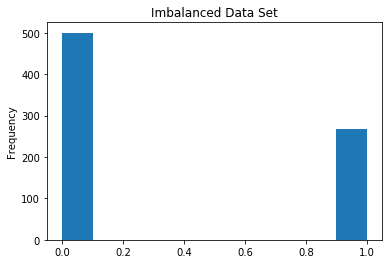

In [15]:
df = pd.read_csv('diabetes.csv')

#Handling of missing values
from sklearn.preprocessing import Imputer
df[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']]=df[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']].replace(0,np.nan)
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_transformed = imr.fit_transform(df)
df = pd.DataFrame(df_transformed, columns = df.columns.values)

# Plot showing imbalanced data
%matplotlib inline
df['Outcome'].plot(kind='hist')
plt.title('Imbalanced Data Set')
plt.show()

feature_columns = df.columns[0:8].values
X = df[feature_columns]
y = df.Outcome

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)


In [16]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Logistic Regression Classifier

Accuracy Score: 0.7272727272727273

Classifcation report:
              precision    recall  f1-score   support

        0.0       0.84      0.75      0.79       157
        1.0       0.56      0.69      0.62        74

avg / total       0.75      0.73      0.73       231



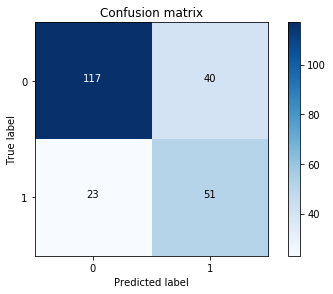

In [18]:
from sklearn.linear_model import LogisticRegression

resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# We can treat the pipeline as a single ML model
pipeline.fit(X_train_std,y_train)
y_pred = pipeline.predict(X_test_std)
print('Accuracy Score: {}\n'.format(pipeline.score(X_test_std,y_test)))
print('Classifcation report:\n', classification_report(y_test, y_pred))

# We print out the confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

## Logistic regression plus PCA

Accuracy Score: 0.7012987012987013

Classifcation report:
              precision    recall  f1-score   support

        0.0       0.81      0.73      0.77       157
        1.0       0.53      0.65      0.58        74

avg / total       0.72      0.70      0.71       231



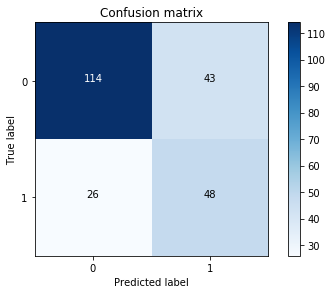

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5,whiten = True)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling),('pca',pca), ('Logistic Regression', model)])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# We can treat the pipeline as a single ML model
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print('Accuracy Score: {}\n'.format(pipeline.score(X_test,y_test)))
print('Classifcation report:\n', classification_report(y_test, y_pred))

# We print out the confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### Random Forest Classifier

Accuracy Score: 0.7965367965367965

Classifcation report:
              precision    recall  f1-score   support

        0.0       0.87      0.83      0.85       157
        1.0       0.67      0.73      0.70        74

avg / total       0.80      0.80      0.80       231



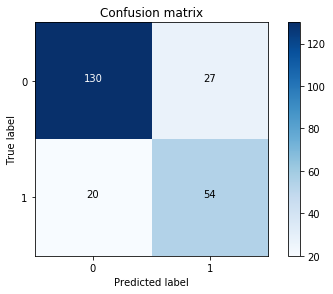

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=120,random_state=0,n_jobs=-1)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest', model)])

# We can treat the pipeline as a single ML model
pipeline.fit(X_train_std,y_train)
y_pred = pipeline.predict(X_test_std)
print('Accuracy Score: {}\n'.format(pipeline.score(X_test_std,y_test)))
print('Classifcation report:\n', classification_report(y_test, y_pred))

# We print out the confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### K-Nearest Neighbors

Accuracy Score: 0.7186147186147186

Classifcation report:
              precision    recall  f1-score   support

        0.0       0.85      0.71      0.77       157
        1.0       0.54      0.74      0.63        74

avg / total       0.75      0.72      0.73       231



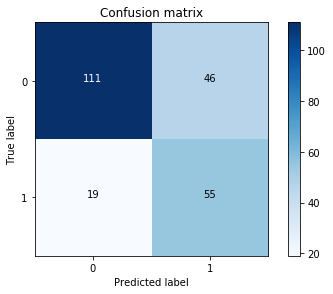

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('K_nearest_neighbor ', model)])

# We can treat the pipeline as a single ML model
pipeline.fit(X_train_std,y_train)
y_pred = pipeline.predict(X_test_std)
print('Accuracy Score: {}\n'.format(pipeline.score(X_test_std,y_test)))
print('Classifcation report:\n', classification_report(y_test, y_pred))

# We print out the confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### Support Vector Classifier

Accuracy Score: 0.7186147186147186

Classifcation report:
              precision    recall  f1-score   support

        0.0       0.73      0.92      0.82       157
        1.0       0.63      0.30      0.40        74

avg / total       0.70      0.72      0.68       231



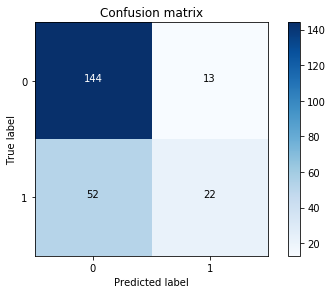

In [26]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0,gamma=2.0,random_state=0)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('SVM ', model)])

# We can treat the pipeline as a single ML model
pipeline.fit(X_train_std,y_train)
y_pred = pipeline.predict(X_test_std)
print('Accuracy Score: {}\n'.format(pipeline.score(X_test_std,y_test)))
print('Classifcation report:\n', classification_report(y_test, y_pred))

# We print out the confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()


In [ ]:
#df_test = df.head(20)
#np.where(df_test['Insulin'] == 0,1,df_test['Insulin'])  #return 1 where true else retain the value
#df_test['Insulin'] = df_test['Insulin'].replace(0,np.nan) #replaces the value of 0 with np.nan
#df_test.columns.values
#df_test.dropna(subset = ['Insulin']) #drops the rows with the NaN data
#df_test.drop(labels=['Glucose','Insulin'],axis=1) #Drops the glucose and insulin column